<a href="https://colab.research.google.com/github/hind190/Data-Mining-Project-/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Phase#2: Data Summarization and Preprocessing**


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math



df = pd.read_csv('production_data.csv')
df = pd.DataFrame(df)

# --- Make a copy of the raw dataset to keep it unedited ---
Preprocessed_dataset = df.copy()

# **Part 1: Data Analysis**

## Statistical Summaries
This section provides statistical summaries for numerical attributes to understand the data distribution, central tendency, and variability.

In [4]:
# Statistical summary for numerical attributes
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


The statistical summary provides key information about the numerical attributes, including the minimum, maximum, mean, and quartile values. These statistics help in understanding the range and distribution of the data. The presence of large differences between minimum and maximum values may indicate variability or potential outliers. This information is useful for identifying attributes that may require normalization or outlier handling during preprocessing.

Five Number Summary

In [ ]:
import pandas as pd

df = pd.read_csv('production_data.csv')

In [ ]:
five_summary = df.describe().loc[['min','25%','50%','75%','max']]
five_summary

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
min,1.0,0.07,2.90,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.233705
25%,3.0,0.70,3.94,774.5,1440.0,0.0,0.0,0.0,0.0,9.0,0.650307
50%,6.0,0.75,15.26,1039.0,3960.0,0.0,0.0,0.0,0.0,34.0,0.773333
75%,9.0,0.80,24.26,1252.5,6960.0,50.0,0.0,0.0,0.0,57.0,0.850253
max,12.0,0.80,54.56,23122.0,25920.0,3600.0,300.0,45.0,2.0,89.0,1.120437


The five number summary provides the minimum, first quartile (Q1), median, third quartile (Q3), and maximum values for each numerical attribute.
The large differences between minimum and maximum values indicate high variability and potential outliers, which suggests the need for normalization and outlier handling in preprocessing.

### Missing Values Analysis
This section checks for missing values in the dataset and highlights where they occur. Understanding missing data helps determine the preprocessing steps needed before modeling.

Missing values per column (only columns with missing values):
wip    506
dtype: int64


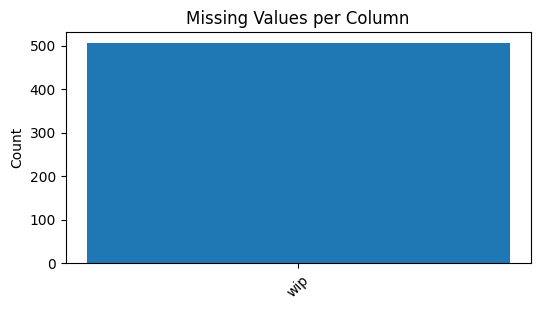


Missing WIP values by department:
department
finishing     257
finishing     249
Name: count, dtype: int64


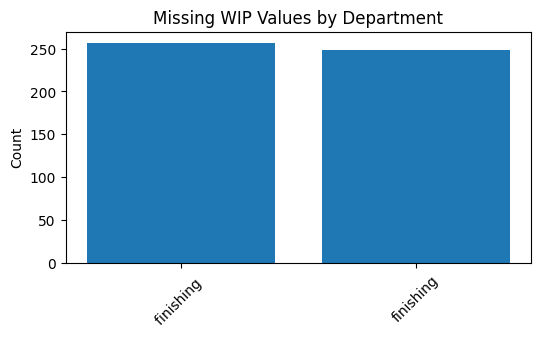

In [ ]:
import matplotlib.pyplot as plt

# 1) Count missing values per column
missing = df.isnull().sum().sort_values(ascending=False)

print("Missing values per column (only columns with missing values):")
print(missing[missing > 0])

# 2) Plot missing values (only if there are missing values)
missing_nonzero = missing[missing > 0]

if len(missing_nonzero) > 0:
    plt.figure(figsize=(6,3))
    plt.bar(missing_nonzero.index, missing_nonzero.values)
    plt.title("Missing Values per Column")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

# 3) If WIP has missing values, analyze by department
if 'wip' in df.columns and df['wip'].isnull().sum() > 0:
    missing_wip = df[df['wip'].isnull()]
    missing_by_dept = missing_wip['department'].value_counts()

    print("\nMissing WIP values by department:")
    print(missing_by_dept)

    plt.figure(figsize=(6,3))
    plt.bar(missing_by_dept.index, missing_by_dept.values)
    plt.title("Missing WIP Values by Department")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

The missing value analysis shows that missing data is concentrated in the **wip** attribute.
When broken down by department, the missing wip values appear mainly in one department, which suggests that the missingness may be systematic rather than random.
Therefore, handling missing values (e.g., imputation using department-based statistics) will be needed during preprocessing to ensure data consistency and avoid issues in modeling.

### Outlier Detection
This section identifies extreme values in numerical attributes that fall outside the normal range. Detecting these values helps in understanding the variability of the data and recognizing unusual observations that may affect the analysis. The presence of such extreme values indicates the need for appropriate preprocessing techniques to improve data quality and ensure more reliable modeling results.

In [ ]:
# Selecting numerical columns
numeric_cols = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
    'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity'
]

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    outlier_summary[col] = outliers
    print(f"{col}: {outliers} outliers")

targeted_productivity: 79 outliers
smv: 0 outliers
wip: 22 outliers
over_time: 1 outliers
incentive: 11 outliers
idle_time: 18 outliers
idle_men: 18 outliers
no_of_style_change: 147 outliers
no_of_workers: 0 outliers
actual_productivity: 54 outliers


The results show that several numerical attributes contain extreme values outside the normal range. A high number of outliers were observed in variables such as no_of_style_change, targeted_productivity, and actual_productivity, indicating significant variability in these features. Other attributes such as wip, idle_time, idle_men, and incentive also contain a moderate number of unusual values, while smv and no_of_workers do not show any outliers.

The presence of these extreme values may affect the distribution of the data and the performance of machine learning models. Therefore, preprocessing techniques such as normalization or transformation may be required to reduce the impact of these variations and improve the overall quality of the dataset.

### Boxplot Analysis
Boxplots are used to visually examine the distribution of numerical attributes and to confirm the presence of extreme values.

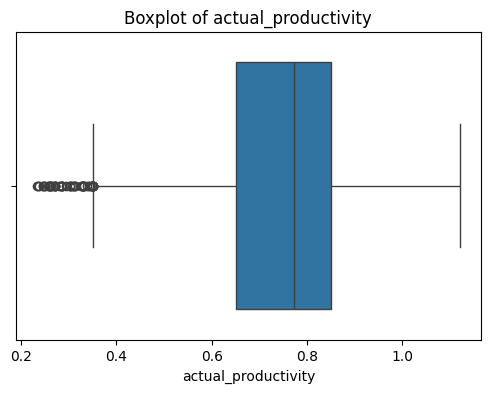

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['actual_productivity'])
plt.title("Boxplot of actual_productivity")
plt.show()

This boxplot shows the distribution of actual productivity and indicates the presence of several extreme values outside the normal range. These outliers suggest high variability and may require normalization during preprocessing.

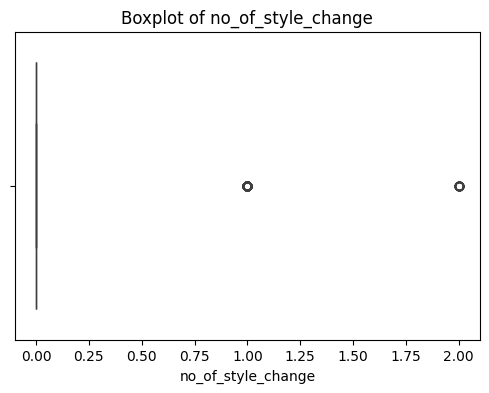

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['no_of_style_change'])
plt.title("Boxplot of no_of_style_change")
plt.show()

The boxplot shows a large number of extreme values in the number of style changes. This indicates significant variation in this feature and suggests the need for preprocessing to reduce the effect of these extreme values.

## Data Visualization
This section presents different plots to understand the dataset distribution and identify patterns that may require preprocessing.

#### Histogram of Actual Productivity

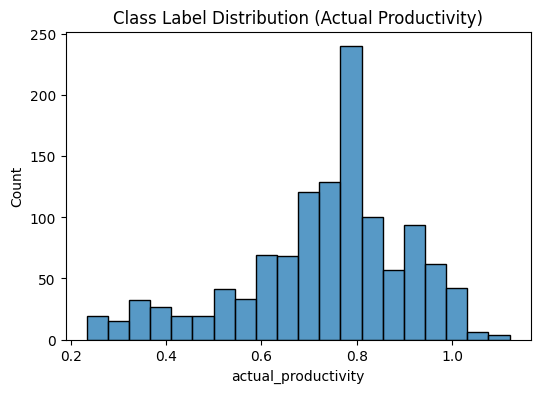

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['actual_productivity'], bins=20)
plt.title("Class Label Distribution (Actual Productivity)")
plt.show()

The histogram shows that actual productivity values are concentrated within a specific range and are not uniformly distributed. This uneven distribution indicates variability in the data and suggests that normalization may be required during preprocessing.

This plot represents the distribution of the target variable (actual productivity), which helps in understanding class balance and variability for modeling.

#### Scatter Plot: Incentive vs Actual Productivity

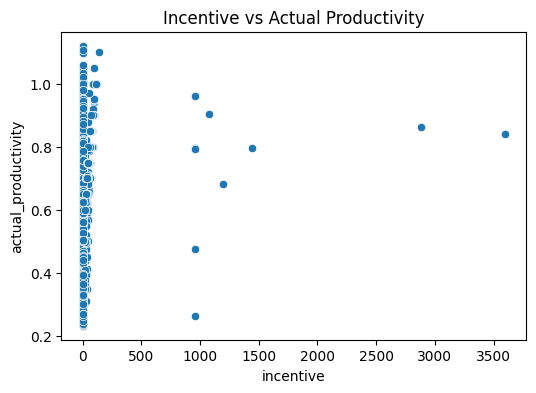

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='incentive', y='actual_productivity', data=df)
plt.title("Incentive vs Actual Productivity")
plt.show()

The scatter plot shows the relationship between incentive and actual productivity. The variation in the spread of points indicates differences in productivity levels among employees. The presence of scattered and uneven patterns suggests that feature scaling or normalization may be required.

#### Department Distribution (Bar Plot)

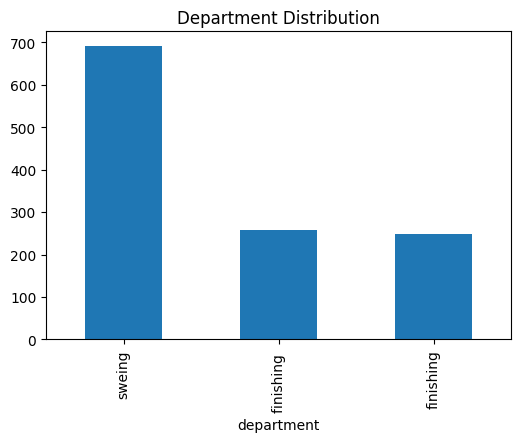

In [ ]:
plt.figure(figsize=(6,4))
df['department'].value_counts().plot(kind='bar')
plt.title("Department Distribution")
plt.show()

The bar plot shows an imbalance in the number of records across departments. This uneven distribution may affect model performance and indicates the need for categorical encoding and proper preprocessing.

Data Analysis — Part 1 Continued

The statistical summary shows variation across numerical features such as actual productivity, incentive, and over_time.
Some variables have a wide range between minimum and maximum values, indicating variability in the dataset.
This suggests that preprocessing techniques such as normalization may be required to standardize the data.

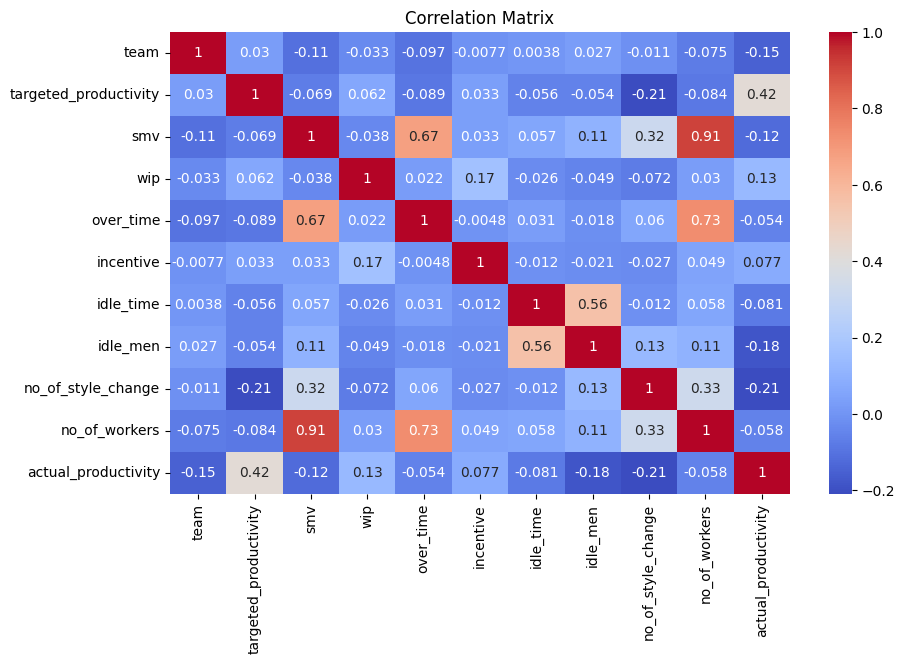

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows the relationships between numerical variables.
Strong positive or negative correlations indicate important relationships between features.
These relationships help in identifying which variables may influence productivity.

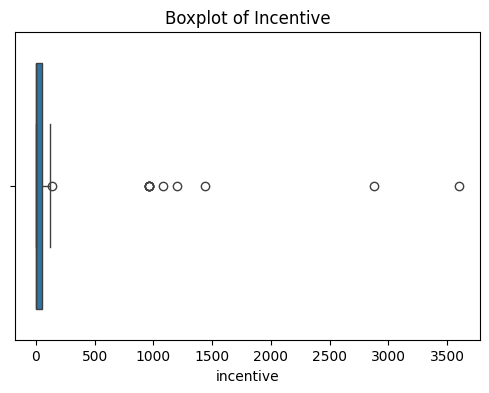

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["incentive"])
plt.title("Boxplot of Incentive")
plt.show()

The boxplot shows the distribution of incentive values and highlights the presence of outliers.
The existence of extreme values indicates variability among employees and supports the need for preprocessing.

Overall, the dataset shows variability and the presence of outliers in several features.
These findings indicate that preprocessing techniques such as normalization and feature scaling will be necessary in the next phase to improve model performance.

# **Part 2: Data Preprocessing**
In this part, we apply a series of data preprocessing techniques to prepare the dataset for accurate and reliable analysis. The techniques used include Discretization, Noise Removal, Handling Missing Values, and Normalization. These techniques were chosen based on the structure of the dataset and the analytical requirements.

For each technique, we provide an explanation of why it was necessary, how it was implemented, and which attributes it was applied to. We also include a brief description of the results, outlining how the dataset improved as a result of these transformations. These preprocessing steps help reduce inconsistencies, minimize the impact of noise, balance feature scales, and improve interpretability for downstream tasks such as K-Means clustering and Decision Tree classification.

Finally, snapshots of both the raw dataset and the preprocessed dataset are provided to clearly demonstrate the changes made.

**Noise Removal**

In [ ]:
# 1. Check minimum value before cleaning
min_before = Preprocessed_dataset['targeted_productivity'].min()
print(f"Lowest targeted_productivity before cleaning: {min_before}")

# 2. Remove unrealistic or noisy values (below 0.1)
Preprocessed_dataset = Preprocessed_dataset[Preprocessed_dataset['targeted_productivity'] >= 0.1].reset_index(drop=True)

# 3. Check minimum value after cleaning
min_after = Preprocessed_dataset['targeted_productivity'].min()
print(f"Lowest targeted_productivity after cleaning: {min_after}")

# 4. Summary
removed_count = len(df) - len(Preprocessed_dataset)
print(f"\nNoise removal complete. {removed_count} data point removed.")

Lowest targeted_productivity before cleaning: 0.35
Lowest targeted_productivity after cleaning: 0.35

Noise removal complete. 1 data point removed.


In [ ]:
# 1. Check maximum value before cleaning
max_before = Preprocessed_dataset['over_time'].max()
print(f"Highest over_time before cleaning: {max_before}")

# 2. Remove values greater than 25,000 (noise)
Preprocessed_dataset = Preprocessed_dataset[Preprocessed_dataset['over_time'] <= 25000].reset_index(drop=True)

# 3. Check maximum value after cleaning
max_after = Preprocessed_dataset['over_time'].max()
print(f"Highest over_time after cleaning: {max_after}")

# 4. Summary
removed_count = len(df) - len(Preprocessed_dataset)
print(f"\nNoise removal complete. {removed_count} data points removed.")

Highest over_time before cleaning: 25920
Highest over_time after cleaning: 15120

Noise removal complete. 2 data points removed.


**Explanation of the Technique (why and how it was applied and which attributes were selected for it):**

Noise removal was applied to eliminate unrealistic values that could distort the analysis and lead to incorrect conclusions. This technique was chosen after exploratory data analysis (EDA) revealed anomalies in over_time and targeted_productivity attributes. For instance, one record showed an over_time value of 25,000 minutes, which is unrealistic even when distributed across all 54 team members, and certain entries in targeted_productivity were below 0.1, which is implausibly low and likely due to data entry errors. To maintain accuracy, these records were removed by keeping only entries where over_time ≤ 25000 and targeted_productivity ≥ 0.1.

**Description of Preprocessing Results (and how this technique improved the dataset):**

After the removal of unrealistic records, both attributes now reflect feasible and consistent ranges. The lowest targeted_productivity value became 0.35, which is a realistic and achievable productivity level in factory conditions. Similarly, the lowest over_time value now stands at 15,000 minutes, equivalent to about 250 hours, which is a plausible cumulative overtime duration for a full team of 30 employees. This process reduced data distortion, enhanced reliability, and ensured that the dataset now represents realistic target production behavior, leading to more accurate insights and reliable modeling outcomes.

**Descretization**

In [ ]:
# Define number of bins and labels
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Apply discretization
Preprocessed_dataset['discretized_actual_productivity'] = pd.cut(
    Preprocessed_dataset['actual_productivity'],
    bins=num_bins,
    labels=bin_labels,
    include_lowest=True
)

# Print summary
print('-------------------------------------------------------')
print('Discretization complete: actual_productivity → discretized_actual_productivity')
print('-------------------------------------------------------')
print('First few values:')
print(Preprocessed_dataset[['actual_productivity', 'discretized_actual_productivity']].head())
print('-------------------------------------------------------')
print('Number of instances for each label:')
print('-------------------------------------------------------')
print('Class  -- Count ---------------------------------------')
print(Preprocessed_dataset['discretized_actual_productivity'].value_counts())
print('-------------------------------------------------------')

-------------------------------------------------------
Discretization complete: actual_productivity → discretized_actual_productivity
-------------------------------------------------------
First few values:
   actual_productivity discretized_actual_productivity
0             0.940725                            High
1             0.886500                            High
2             0.800570                          Medium
3             0.800570                          Medium
4             0.800382                          Medium
-------------------------------------------------------
Number of instances for each label:
-------------------------------------------------------
Class  -- Count ---------------------------------------
discretized_actual_productivity
Medium    691
High      344
Low       160
Name: count, dtype: int64
-------------------------------------------------------


**Explanation for the Technique (why and how it was applied and which attributes were selected):**

Discretization was applied to convert the continuous actual_productivity feature into categorical labels to better suit classification algorithms like Decision Trees. These algorithms tend to perform better when target variables are discrete, as it allows for clear and interpretable rule-based outputs. The process divided actual_productivity into three categories: Low, Medium, and High, using the pd.cut() function with equal-width binning. This ensured that the full range of productivity values was captured while maintaining simplicity and interpretability, which are important for better understanding the model’s outcomes.

**Description of Preprocessing Results (and how this technique improved the dataset):**

After discretization, the new column discretized_actual_productivity grouped the data into three balanced categories: Medium (691 instances), High (344 instances), and Low (160 instances). This transformation made the target variable more suitable for Decision Tree classification, as the model could now work with clearly defined classes instead of continuous values. Additionally, the categorization enhanced interpretability by allowing a direct comparison across productivity levels and minimized the impact of small fluctuations in continuous measurements. This made the dataset more reliable and easier to model.

Part 2 Continued: Feature Selection & Normalization

In [ ]:
df_work = Preprocessed_dataset.copy()
df_work.shape

(1197, 15)

In this section, we perform feature selection analysis to identify the most informative numerical attributes without removing any columns.
Then, we apply normalization to scale numerical features to a comparable range, which supports better modeling and clustering in later phases.

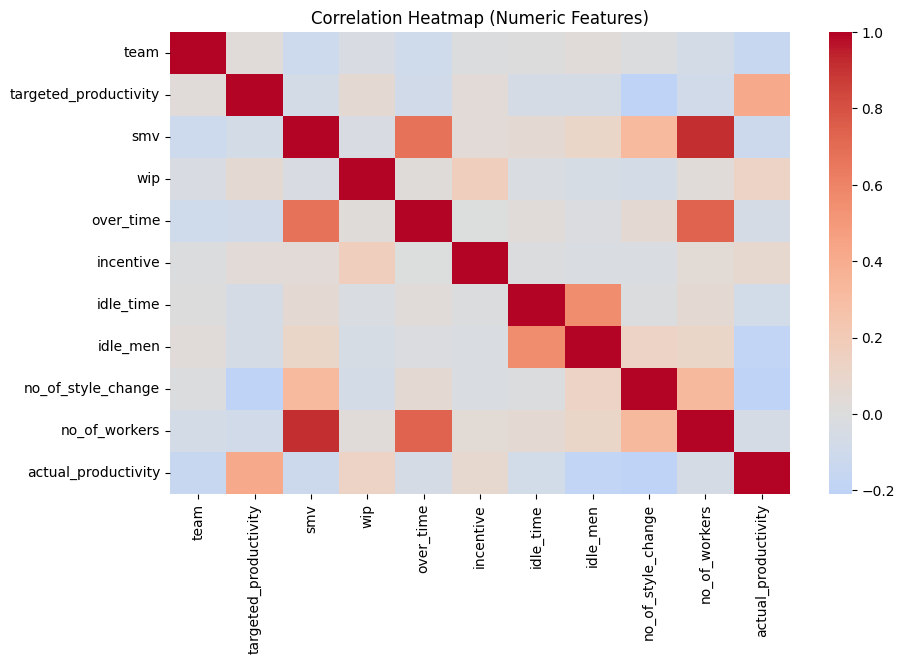

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df_work.select_dtypes(include=[np.number]).columns.tolist()
corr = df_work[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
target = "actual_productivity"

if target in df_work.columns:
    corr_target = corr[target].abs().sort_values(ascending=False)
    print("Top correlated features with actual_productivity:")
    display(corr_target.head(10))
else:
    print("actual_productivity not found in df_work.")

Top correlated features with actual_productivity:


,actual_productivity
actual_productivity,1.000000
targeted_productivity,0.421594
no_of_style_change,0.207366
idle_men,0.181734
team,0.148753
wip,0.131147
smv,0.122089
idle_time,0.080851
incentive,0.076538
no_of_workers,0.057991


The correlation analysis highlights which numerical variables are more strongly related to actual productivity.
These variables are likely more informative for prediction and clustering in later phases.
No attributes were removed; this step is used only to guide feature importance.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_work.copy()
scaler = MinMaxScaler()
df_scaled[num_cols] = scaler.fit_transform(df_work[num_cols])

df_scaled[num_cols].describe().T[["min","max","mean","std"]].head(10)

,min,max,mean,std
team,0.0,1.0,0.493355,0.314906
targeted_productivity,0.0,1.0,0.903606,0.134097
smv,0.0,1.0,0.235427,0.211832
wip,0.0,1.0,0.051199,0.079492
over_time,0.0,1.0,0.176214,0.129198
incentive,0.0,1.0,0.010614,0.044495
idle_time,0.0,1.0,0.002434,0.042366
idle_men,0.0,1.0,0.008206,0.072644
no_of_style_change,0.0,1.0,0.075188,0.213924
no_of_workers,0.0,1.0,0.374826,0.255146


Min-Max normalization scales numerical features into the range [0,1].
This reduces the impact of different units and makes features comparable, which is useful for distance-based methods such as K-means.

In [ ]:
print("Before normalization (sample):")
display(df_work.head(5))

print("After normalization (sample):")
display(df_scaled.head(5))

Before normalization (sample):


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


After normalization (sample):


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,0.636364,1.000000,0.450252,0.047631,0.273148,0.027222,0.0,0.0,0.0,0.655172,0.797332
1,1/1/2015,Quarter1,finishing,Thursday,0.000000,0.931507,0.020132,NaN,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.736180
2,1/1/2015,Quarter1,sweing,Thursday,0.909091,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.639274
3,1/1/2015,Quarter1,sweing,Thursday,1.000000,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.639274
4,1/1/2015,Quarter1,sweing,Thursday,0.454545,1.000000,0.445219,0.050314,0.074074,0.013889,0.0,0.0,0.0,0.620690,0.639062


In [7]:
print("Final Preprocessed Dataset Snapshot:")
Preprocessed_dataset.head()

Final Preprocessed Dataset Snapshot:


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [8]:
Preprocessed_dataset.to_csv("Preprocessed_dataset.csv", index=False)
print("Saved: Preprocessed_dataset.csv")


Saved: Preprocessed_dataset.csv


The final preprocessed dataset was saved as Preprocessed_dataset.csv.
It includes cleaned records, discretized productivity labels, and normalized numerical features, ready for the next phase.